<a href="https://colab.research.google.com/github/Sabindara17/Machine-Learning/blob/main/timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LAB 5: Time series data preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Original


In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:

filename = 'climate_data_nepal.csv'
df = pd.read_csv(filename)

In [ ]:
df.head()

,DATE,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,T2M_MAX,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
0,1981-01-31,27.9,83.2,67.31,93.78,5.28,53.09,13.03,3.34,19.17,...,10.03,11.19,2.01,3.39,0.81,2.59,2.70,4.22,1.06,3.16
1,1981-02-28,27.9,83.2,3.37,93.52,5.13,40.88,16.67,2.94,24.41,...,13.08,15.10,2.58,4.88,0.95,3.94,3.51,5.62,1.09,4.53
2,1981-03-31,27.9,83.2,26.02,93.40,5.91,35.84,20.83,4.84,28.31,...,13.52,20.58,2.73,4.67,1.02,3.65,3.73,5.72,1.38,4.34
3,1981-04-30,27.9,83.2,46.15,93.03,6.52,29.81,25.50,5.94,33.42,...,15.03,25.63,2.89,4.78,1.07,3.72,3.82,5.66,1.35,4.31
4,1981-05-31,27.9,83.2,69.45,92.75,9.95,37.25,28.89,12.45,35.70,...,13.43,29.99,2.69,4.40,0.93,3.47,3.52,5.29,1.30,4.00


In [ ]:

df.set_index('DATE', inplace=True)

In [ ]:
df.isnull().sum()

,0
LAT,0
LON,0
PRECTOT,0
PS,0
QV2M,0
RH2M,0
T2M,0
T2MWET,0
T2M_MAX,0
T2M_MIN,0


In [ ]:
df

,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
DATE,,,,,,,,,,,,,,,,,,,,
1981-01-31,27.9,83.2,67.31,93.78,5.28,53.09,13.03,3.34,19.17,9.14,10.03,11.19,2.01,3.39,0.81,2.59,2.70,4.22,1.06,3.16
1981-02-28,27.9,83.2,3.37,93.52,5.13,40.88,16.67,2.94,24.41,11.33,13.08,15.10,2.58,4.88,0.95,3.94,3.51,5.62,1.09,4.53
1981-03-31,27.9,83.2,26.02,93.40,5.91,35.84,20.83,4.84,28.31,14.79,13.52,20.58,2.73,4.67,1.02,3.65,3.73,5.72,1.38,4.34
1981-04-30,27.9,83.2,46.15,93.03,6.52,29.81,25.50,5.94,33.42,18.38,15.03,25.63,2.89,4.78,1.07,3.72,3.82,5.66,1.35,4.31
1981-05-31,27.9,83.2,69.45,92.75,9.95,37.25,28.89,12.45,35.70,22.28,13.43,29.99,2.69,4.40,0.93,3.47,3.52,5.29,1.30,4.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-31,26.9,86.5,4.46,94.41,20.34,85.51,27.01,24.27,29.98,24.44,5.54,27.11,2.66,4.52,1.12,3.40,3.66,5.32,1.93,3.39
2019-09-30,26.9,86.5,9.93,94.92,18.62,87.16,25.24,22.85,28.04,23.12,4.91,25.25,2.40,3.86,1.17,2.68,3.40,4.70,2.05,2.65
2019-10-31,26.9,86.5,0.28,95.34,15.04,84.67,22.26,19.44,26.24,19.29,6.95,22.08,1.79,3.21,0.62,2.59,2.48,3.73,0.97,2.76


In [ ]:
df.tail()

,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
DATE,,,,,,,,,,,,,,,,,,,,
2019-08-31,26.9,86.5,4.46,94.41,20.34,85.51,27.01,24.27,29.98,24.44,5.54,27.11,2.66,4.52,1.12,3.40,3.66,5.32,1.93,3.39
2019-09-30,26.9,86.5,9.93,94.92,18.62,87.16,25.24,22.85,28.04,23.12,4.91,25.25,2.40,3.86,1.17,2.68,3.40,4.70,2.05,2.65
2019-10-31,26.9,86.5,0.28,95.34,15.04,84.67,22.26,19.44,26.24,19.29,6.95,22.08,1.79,3.21,0.62,2.59,2.48,3.73,0.97,2.76
2019-11-30,26.9,86.5,0.04,95.48,11.26,73.08,19.96,14.75,25.11,16.34,8.77,18.75,1.56,2.92,0.46,2.47,2.09,3.29,0.67,2.62
2019-12-31,26.9,86.5,0.35,95.74,6.57,61.07,14.33,6.62,20.51,10.47,10.05,12.57,1.79,3.25,0.66,2.60,2.47,3.93,0.83,3.09


In [ ]:
df.isnull().sum()

,0
LAT,0
LON,0
PRECTOT,0
PS,0
QV2M,0
RH2M,0
T2M,0
T2MWET,0
T2M_MAX,0
T2M_MIN,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Normalize the data

numerical_columns = df.columns[df.dtypes != 'object']
scaler = MinMaxScaler(feature_range=(0, 1))
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])



In [ ]:
df.describe()

,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
count,29016.000000,29016.000000,29016.000000,29016.000000,29016.000000,29016.000000,29016.000000,29016.000000,29016.000000,29016.000000,29016.000000,29016.000000,29016.000000,29016.000000,29016.000000,29016.000000,29016.000000,29016.000000,29016.000000,29016.000000
mean,0.420184,0.522208,0.107383,0.619218,0.368278,0.545140,0.629310,0.576703,0.606960,0.662221,0.431196,0.628935,0.222743,0.284567,0.166918,0.347217,0.217037,0.221998,0.170038,0.296159
std,0.251501,0.281808,0.154048,0.241726,0.249037,0.240195,0.169365,0.212886,0.159868,0.168634,0.195599,0.160521,0.110676,0.117567,0.110166,0.147300,0.123769,0.114736,0.121104,0.130264
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.228571,0.275641,0.005827,0.501805,0.158950,0.350944,0.521301,0.416803,0.509430,0.558323,0.274687,0.525866,0.134529,0.200463,0.085616,0.239416,0.130000,0.137487,0.082160,0.198198
50%,0.414286,0.525641,0.034354,0.637748,0.285442,0.511644,0.645506,0.560303,0.619268,0.676982,0.456189,0.643455,0.213004,0.273465,0.140411,0.334307,0.193333,0.206230,0.136150,0.271772
75%,0.600000,0.730769,0.155405,0.842283,0.578520,0.768393,0.752809,0.759608,0.719490,0.787218,0.577191,0.745935,0.293722,0.358053,0.222603,0.445255,0.283333,0.285714,0.223005,0.376877
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
import numpy as np

def df_to_X_y(df, window_size=10, target_column='PRECTOT'):
    df_as_np = df.to_numpy()
    X = []
    y = []

    for i in range(len(df_as_np)-window_size):
        row = [df_as_np[i+j, 0:] for j in range(window_size)]
        X.append(row)

        label = df_as_np[i+window_size, df.columns.get_loc(target_column)]
        y.append(label)

    return np.array(X), np.array(y)



In [ ]:
WINDOW_SIZE = 10
X, y = df_to_X_y(df, WINDOW_SIZE)
X.shape, y.shape

((29006, 10, 20), (29006,))

In [ ]:
X_train1, y_train1 = X[:16000], y[:16000]
X_val1, y_val1 = X[16000:22000], y[16000:22000]
X_test1, y_test1 = X[22000:], y[22000:]
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((16000, 10, 20), (16000,), (6000, 10, 20), (6000,), (7006, 10, 20), (7006,))

In [ ]:
X_train1.dtype

dtype('float64')

In [ ]:
X_train1 = np.asarray(X_train1, dtype=np.float32)
y_train1 = np.asarray(y_train1, dtype=np.float32)

In [ ]:
X_train1.dtype

dtype('float32')

In [ ]:
X_val1 = np.asarray(X_val1, dtype=np.float32)
y_val1 = np.asarray(y_val1, dtype=np.float32)

In [ ]:
X_test1 = np.asarray(X_test1, dtype=np.float32)
y_test1 = np.asarray(y_test1, dtype=np.float32)

Lab 6: Feature Extraction and Model Development

In [ ]:
!pip install pyWavelets

In [ ]:
import pywt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

def apply_wavelet_transform(data):
    coefficients, _ = pywt.dwt(data, 'db1')
    approx_coefficients = coefficients[:len(data)]
    return approx_coefficients

X_train1 = np.array([apply_wavelet_transform(series) for series in X_train1])
X_val1 = np.array([apply_wavelet_transform(series) for series in X_val1])
X_test1 = np.array([apply_wavelet_transform(series) for series in X_test1])

print("X_train_wavelet shape:", X_train1.shape)
print("X_val_wavelet shape:", X_val1.shape)
print("X_test_wavelet shape:", X_test1.shape)


X_train_wavelet shape: (16000, 10, 10)
X_val_wavelet shape: (6000, 10, 10)
X_test_wavelet shape: (7006, 10, 10)


In [ ]:
scaler = MinMaxScaler()

X_train1 = scaler.fit_transform(X_train1.reshape(-1, 10 * 10)).reshape(-1, 10, 10)
X_val1 = scaler.transform(X_val1.reshape(-1, 10 * 10)).reshape(-1, 10, 10)
X_test1 = scaler.transform(X_test1.reshape(-1, 10 * 10)).reshape(-1, 10, 10)


# LSTM

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import LSTM, Dropout, Dense, InputLayer, Activation
from tensorflow.keras.models import Sequential

model4 = Sequential()
model4.add(InputLayer((10, 10)))

model4.add(LSTM(128, dropout=0.2, recurrent_dropout=0.0, return_sequences=True))
model4.add(Dropout(0.2))

model4.add(LSTM(64, dropout=0.2, recurrent_dropout=0.0, return_sequences=True))
model4.add(Dropout(0.2))

model4.add(LSTM(32, dropout=0.2, recurrent_dropout=0.0, return_sequences=False))
model4.add(Dropout(0.2))

model4.add(Dense(16, activation='relu'))
model4.add(Dense(8, activation='relu'))

model4.add(Dense(1, activation='linear'))

model4.compile(optimizer='adam', loss='mse', metrics=['mae'])

model4.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 10, 128)             │          71,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 10, 64)              │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 133,665 (522.13 KB)

 Trainable params: 133,665 (522.13 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

cp4 = ModelCheckpoint('model4/', save_best_only=True)
#model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


ValueError: The filepath provided must end in `.keras` (Keras model format). Received: filepath=model4/

In [ ]:
from tensorflow.keras.metrics import MeanAbsolutePercentageError
model4.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.00001), metrics=['mean_absolute_error', RootMeanSquaredError(), MeanAbsolutePercentageError()])


In [ ]:
history4 = model4.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=30, callbacks=[cp4], batch_size=3)

Epoch 1/30
5334/5334 [==============================] - 77s 13ms/step - loss: 0.0961 - mean_absolute_error: 0.0961 - root_mean_squared_error: 0.1693 - mean_absolute_percentage_error: 1171955.2500 - val_loss: 0.0950 - val_mean_absolute_error: 0.0950 - val_root_mean_squared_error: 0.1661 - val_mean_absolute_percentage_error: 1296013.5000
Epoch 2/30
5334/5334 [==============================] - 65s 12ms/step - loss: 0.0891 - mean_absolute_error: 0.0891 - root_mean_squared_error: 0.1573 - mean_absolute_percentage_error: 1092793.5000 - val_loss: 0.0817 - val_mean_absolute_error: 0.0817 - val_root_mean_squared_error: 0.1485 - val_mean_absolute_percentage_error: 688749.7500
Epoch 3/30
5334/5334 [==============================] - 61s 11ms/step - loss: 0.0779 - mean_absolute_error: 0.0779 - root_mean_squared_error: 0.1367 - mean_absolute_percentage_error: 876822.2500 - val_loss: 0.0682 - val_mean_absolute_error: 0.0682 - val_root_mean_squared_error: 0.1260 - val_mean_absolute_percentage_error: 4

In [ ]:
from tensorflow.keras.models import load_model
model4 = load_model('model4/')

In [ ]:
train_predictions = model4.predict(X_train1)

500/500 [==============================] - 3s 4ms/step


In [ ]:
import pandas as pd

# Select predictions for the first time step and flatten
#train_predictions_flat = train_predictions[:, 0, 0]
train_predictions_flat = train_predictions[:, 0]

train_results = pd.DataFrame(data={'Train Predictions': train_predictions_flat, 'Actuals': y_train1})

In [ ]:
train_results

,Train Predictions,Actuals
0,0.004713,0.057117
1,0.004058,0.002134
2,0.005561,0.089991
3,0.007847,0.035523
4,0.010192,0.056556
...,...,...
15995,0.009337,0.013321
15996,0.006167,0.000000
15997,0.005561,0.025224
15998,0.006570,0.032391


Lab 7: Model Evaluation and Prediction

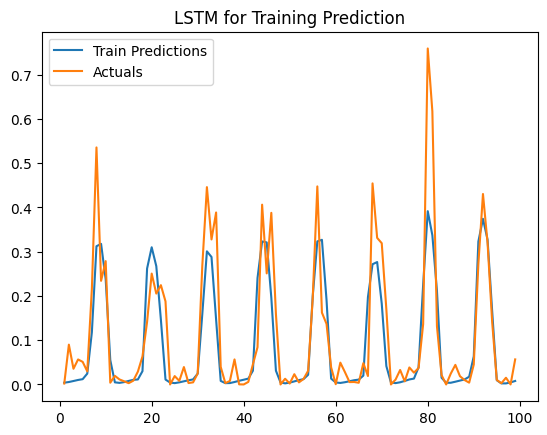

In [ ]:
import matplotlib.pyplot as plt

# Plot Train Predictions and Actuals
plt.title("LSTM for Training Prediction")
plt.plot(train_results['Train Predictions'][1:100], label='Train Predictions')
plt.plot(train_results['Actuals'][1:100], label='Actuals')
plt.legend()
plt.show()

In [ ]:
val_predictions = model4.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

188/188 [==============================] - 3s 5ms/step


,Val Predictions,Actuals
0,0.008928,0.008850
1,0.014982,0.010267
2,0.139151,0.061651
3,0.158858,0.097407
4,0.147642,0.174670
...,...,...
5995,0.045800,0.016920
5996,0.013485,0.055466
5997,0.006921,0.004908
5998,0.008127,0.100897


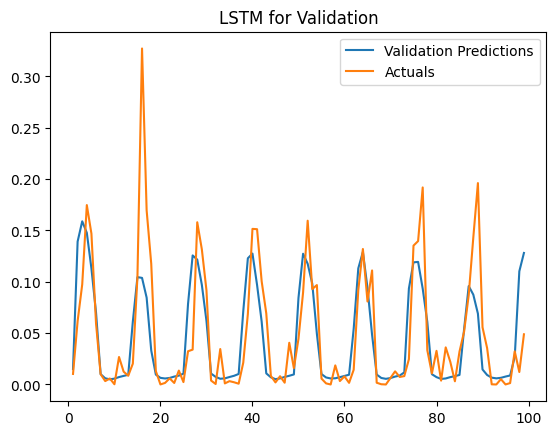

In [ ]:
plt.title("LSTM for Validation")
plt.plot(val_results['Val Predictions'][1:100], label='Validation Predictions')
plt.plot(val_results['Actuals'][1:100],label='Actuals')
plt.legend()
plt.show()

In [ ]:
test_predictions = model4.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

219/219 [==============================] - 1s 3ms/step


,Test Predictions,Actuals
0,0.011416,0.063817
1,0.018582,0.020208
2,0.042846,0.040758
3,0.133379,0.176056
4,0.230119,0.295899
...,...,...
7001,0.298419,0.006949
7002,0.139212,0.015471
7003,0.007986,0.000436
7004,0.003724,0.000062


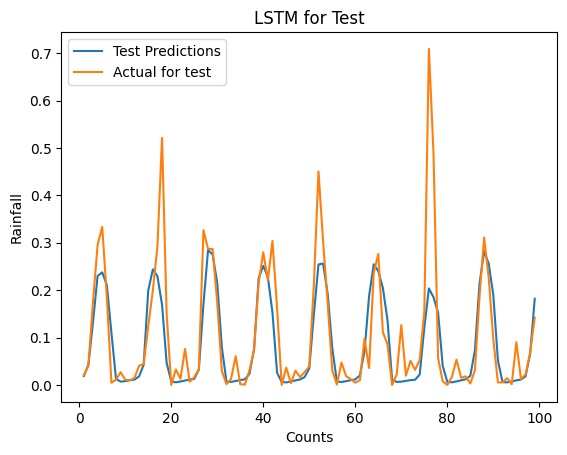

In [ ]:
plt.title("LSTM for Test")
plt.plot(test_results['Test Predictions'][1:100] , label='Test Predictions')
plt.plot(test_results['Actuals'][1:100], label='Actual for test')
plt.xlabel('Counts')
plt.ylabel('Rainfall')
plt.legend()
plt.show()

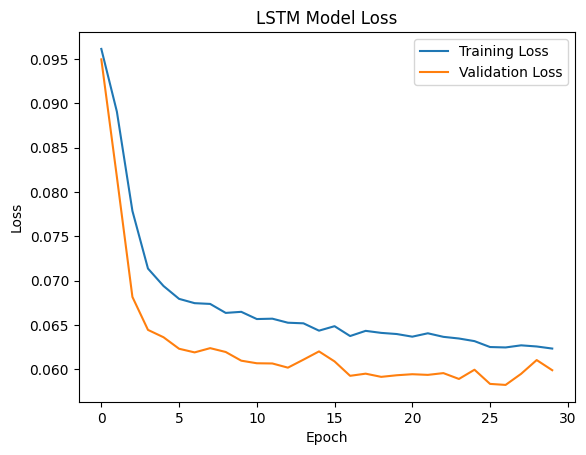

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf


# Plotting the training and validation loss
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


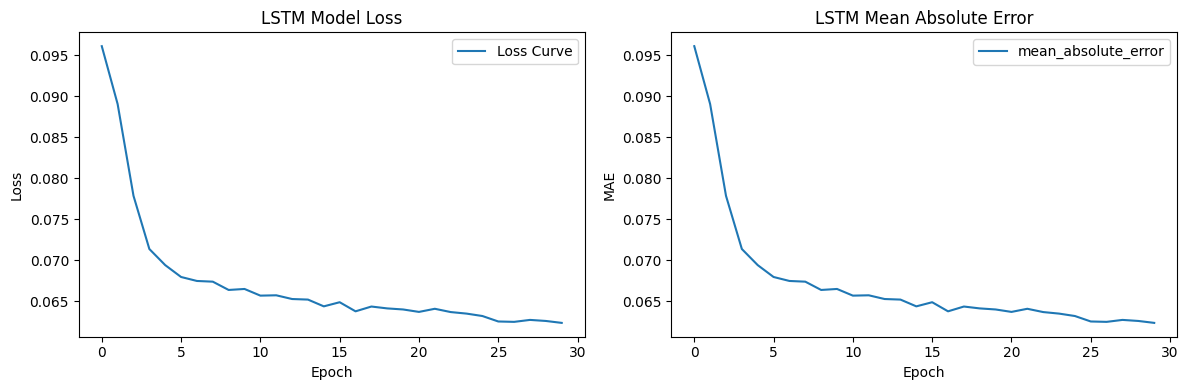

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history4.history['loss'], label='Loss Curve')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history4.history['mean_absolute_error'], label='mean_absolute_error')
#plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('LSTM Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()


plt.tight_layout()
plt.show()


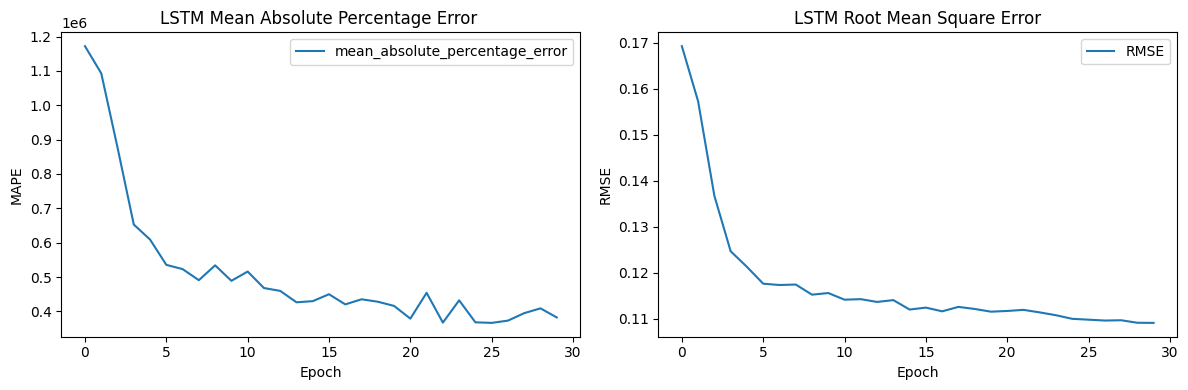

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history4.history['mean_absolute_percentage_error'], label='mean_absolute_percentage_error')
#plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('LSTM Mean Absolute Percentage Error ')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history4.history['root_mean_squared_error'], label='RMSE')
plt.title('LSTM Root Mean Square Error')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()

# GRU


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.layers import GRU, Dropout, Dense, InputLayer, Activation
from tensorflow.keras.models import Sequential

model4 = Sequential()
model4.add(InputLayer((10, 10)))

model4.add(GRU(128, dropout=0.2, recurrent_dropout=0.0, return_sequences=True))
model4.add(Dropout(0.2))

model4.add(GRU(64, dropout=0.2, recurrent_dropout=0.0, return_sequences=True))
model4.add(Dropout(0.2))

model4.add(GRU(32, dropout=0.2, recurrent_dropout=0.0, return_sequences=False))
model4.add(Dropout(0.2))

model4.add(Dense(16, activation='relu'))
model4.add(Dense(8, activation='relu'))

model4.add(Dense(1, activation='linear'))

model4.compile(optimizer='adam', loss='mse', metrics=['mae'])

model4.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 10, 128)             │          53,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 10, 64)              │          37,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 32)                  │           9,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,089 (394.88 KB)

 Trainable params: 101,089 (394.88 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:

cp4 = ModelCheckpoint('model4.keras', save_best_only=True)
#model4.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])


In [ ]:
from tensorflow.keras.metrics import MeanAbsolutePercentageError
model4.compile(loss='mean_absolute_error', optimizer=Adam(learning_rate=0.00001), metrics=['mean_absolute_error', RootMeanSquaredError(), MeanAbsolutePercentageError()])


In [ ]:
history4 = model4.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=30, callbacks=[cp4], batch_size=3)

Epoch 1/30
5334/5334 ━━━━━━━━━━━━━━━━━━━━ 66s 11ms/step - loss: 0.1177 - mean_absolute_error: 0.1177 - mean_absolute_percentage_error: 2215835.2500 - root_mean_squared_error: 0.1838 - val_loss: 0.0975 - val_mean_absolute_error: 0.0975 - val_mean_absolute_percentage_error: 1616723.1250 - val_root_mean_squared_error: 0.1648
Epoch 2/30
5334/5334 ━━━━━━━━━━━━━━━━━━━━ 74s 10ms/step - loss: 0.0971 - mean_absolute_error: 0.0971 - mean_absolute_percentage_error: 1725927.6250 - root_mean_squared_error: 0.1656 - val_loss: 0.0954 - val_mean_absolute_error: 0.0954 - val_mean_absolute_percentage_error: 1501797.2500 - val_root_mean_squared_error: 0.1649
Epoch 3/30
5334/5334 ━━━━━━━━━━━━━━━━━━━━ 86s 11ms/step - loss: 0.0937 - mean_absolute_error: 0.0937 - mean_absolute_percentage_error: 1467272.0000 - root_mean_squared_error: 0.1608 - val_loss: 0.0922 - val_mean_absolute_error: 0.0922 - val_mean_absolute_percentage_error: 1377339.2500 - val_root_mean_squared_error: 0.1607
Epoch 4/30
5334/5334 ━━━━━━━

In [ ]:
from tensorflow.keras.models import load_model


model4 = load_model('model4.keras')


In [ ]:
train_predictions = model4.predict(X_train1)

500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step


In [ ]:
import pandas as pd

# Select predictions for the first time step and flatten
#train_predictions_flat = train_predictions[:, 0, 0]
train_predictions_flat = train_predictions[:, 0]

train_results = pd.DataFrame(data={'Train Predictions': train_predictions_flat, 'Actuals': y_train1})

In [ ]:
train_results

,Train Predictions,Actuals
0,0.006045,0.057117
1,0.006045,0.002134
2,0.006045,0.089991
3,0.006045,0.035523
4,0.010321,0.056556
...,...,...
15995,0.006045,0.013321
15996,0.006045,0.000000
15997,0.006045,0.025224
15998,0.006045,0.032391


Lab 7: Model Evaluation and Prediction

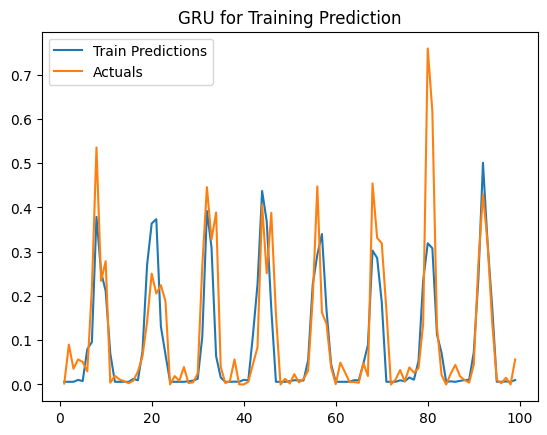

In [ ]:
import matplotlib.pyplot as plt

# Plot Train Predictions and Actuals
plt.title("GRU for Training Prediction")
plt.plot(train_results['Train Predictions'][1:100], label='Train Predictions')
plt.plot(train_results['Actuals'][1:100], label='Actuals')
plt.legend()
plt.show()

In [ ]:
val_predictions = model4.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


,Val Predictions,Actuals
0,0.006045,0.008850
1,0.008108,0.010267
2,0.103432,0.061651
3,0.255725,0.097407
4,0.251621,0.174670
...,...,...
5995,0.111710,0.016920
5996,0.006045,0.055466
5997,0.021474,0.004908
5998,0.006045,0.100897


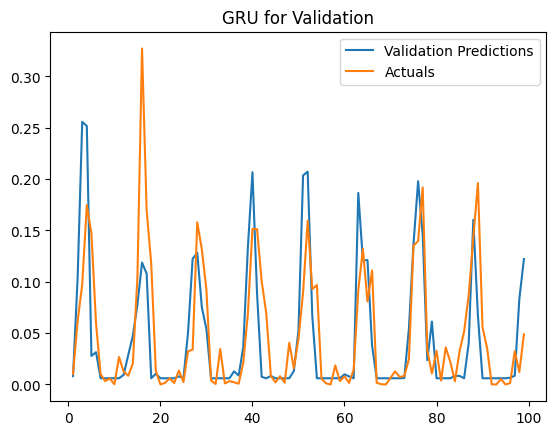

In [ ]:
plt.title("GRU for Validation")
plt.plot(val_results['Val Predictions'][1:100], label='Validation Predictions')
plt.plot(val_results['Actuals'][1:100],label='Actuals')
plt.legend()
plt.show()

In [ ]:
test_predictions = model4.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


,Test Predictions,Actuals
0,0.008561,0.063817
1,0.008264,0.020208
2,0.054024,0.040758
3,0.104471,0.176056
4,0.376601,0.295899
...,...,...
7001,0.158867,0.006949
7002,0.072691,0.015471
7003,0.006045,0.000436
7004,0.006045,0.000062


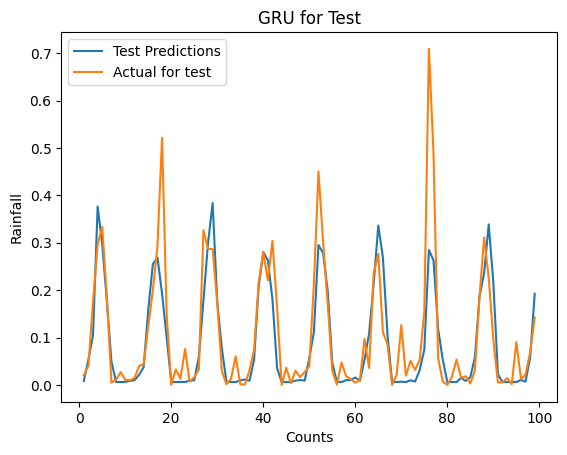

In [ ]:
plt.title("GRU for Test")
plt.plot(test_results['Test Predictions'][1:100] , label='Test Predictions')
plt.plot(test_results['Actuals'][1:100], label='Actual for test')
plt.xlabel('Counts')
plt.ylabel('Rainfall')
plt.legend()
plt.show()

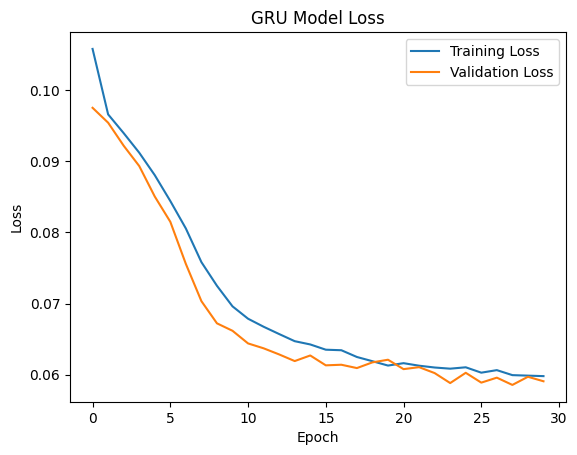

In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf


# Plotting the training and validation loss
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


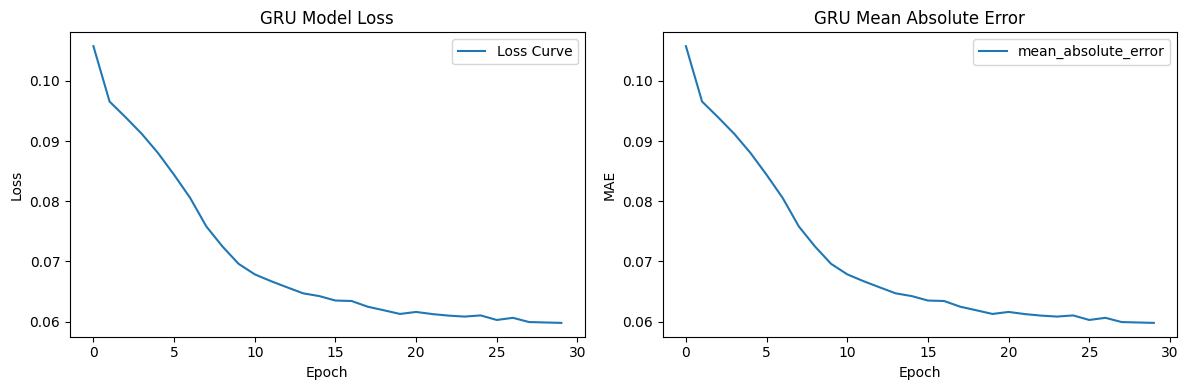

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history4.history['loss'], label='Loss Curve')
#plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('GRU Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history4.history['mean_absolute_error'], label='mean_absolute_error')
#plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('GRU Mean Absolute Error')
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.legend()


plt.tight_layout()
plt.show()


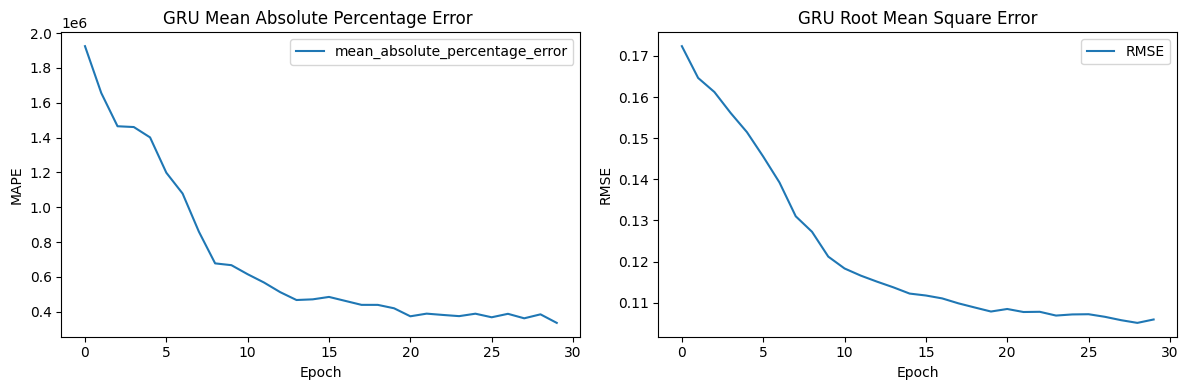

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history4.history['mean_absolute_percentage_error'], label='mean_absolute_percentage_error')
#plt.plot(history.history['val_root_mean_squared_error'], label='Validation RMSE')
plt.title('GRU Mean Absolute Percentage Error ')
plt.xlabel('Epoch')
plt.ylabel('MAPE')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history4.history['root_mean_squared_error'], label='RMSE')
plt.title('GRU Root Mean Square Error')
plt.xlabel('Epoch')
plt.ylabel('RMSE')
plt.legend()

plt.tight_layout()
plt.show()